In [1]:
path = '/Users/mariavarga/AQM/AQM_SessionMaterial/Weekly_Material/Week_6/hgsc.csv'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, VotingClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [4]:
data = pd.read_csv(path).dropna()

In [5]:
data.head()

,class,ABAT,ABHD2,ACTB,ACTR2,ACTR5,ACVR2A,ADAMDEC1,ADCYAP1R1,AEBP1,...,WT1,XPO7,XPOT,YTHDC2,ZDHHC14,ZDHHC7,ZEB1,ZFP36,ZHX3,ZNF423
0,PRO.C5,-0.010674,0.263376,-0.115492,-0.323565,0.005161,-0.504271,-1.283720,-0.433908,0.673072,...,0.077048,0.459961,-0.072049,0.243935,-0.056318,-0.204971,0.179639,-0.292136,-0.034261,0.490152
1,MES.C1,-0.710741,0.110421,0.532555,-0.253877,-0.389024,-0.121941,-1.732920,-0.727880,1.706110,...,0.547120,-0.674773,-0.236746,0.551354,0.215982,0.196677,1.467320,2.461040,0.415041,2.116880
2,DIF.C4,0.881506,0.372862,0.052344,0.028721,-0.848119,-1.281180,1.524370,-0.288317,-2.010830,...,1.058170,0.350895,-0.000051,0.010498,0.592285,-0.338954,-0.842242,0.096242,-0.471005,-1.662190
3,MES.C1,-1.085090,0.415651,0.395376,-0.271050,0.146536,-0.363270,0.993823,-0.450427,1.999170,...,-0.677226,-0.109778,0.033163,0.760080,-1.169030,0.325604,1.785760,-0.212328,0.537493,-0.102138
4,MES.C1,-0.932230,0.045352,0.595068,0.187856,-0.200287,0.211144,1.844640,-0.416482,1.327800,...,0.961688,-0.009010,0.529045,-0.551470,-0.188697,0.157393,0.469166,1.748000,0.144196,-0.561641


In [6]:
data.describe()

,ABAT,ABHD2,ACTB,ACTR2,ACTR5,ACVR2A,ADAMDEC1,ADCYAP1R1,AEBP1,AFP,...,WT1,XPO7,XPOT,YTHDC2,ZDHHC14,ZDHHC7,ZEB1,ZFP36,ZHX3,ZNF423
count,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,...,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000
mean,0.008387,-0.018389,0.006567,0.026521,0.010781,0.008681,0.034882,-0.048004,0.046372,-0.002119,...,0.053700,0.009031,0.027301,0.004048,-0.017932,-0.020583,-0.008142,-0.001834,0.001288,-0.021180
std,0.855034,0.336518,0.397348,0.488962,0.415855,0.585289,1.717745,0.828748,1.127358,0.282604,...,1.070487,0.529161,0.565231,0.470871,0.536496,0.434298,0.695861,1.073584,0.363393,1.039991
min,-1.554020,-1.003640,-2.140110,-1.673060,-1.049950,-1.815440,-2.460760,-1.880380,-2.327670,-0.528737,...,-6.666230,-1.555500,-1.926060,-1.365750,-1.324680,-1.416760,-1.252370,-2.983640,-0.885721,-2.115570
25%,-0.587382,-0.250230,-0.217561,-0.271547,-0.266923,-0.394082,-1.401060,-0.578924,-0.877261,-0.168286,...,-0.273779,-0.369139,-0.338244,-0.340431,-0.372141,-0.309520,-0.510041,-0.717118,-0.258826,-0.809547
50%,-0.094442,-0.028207,0.019348,0.036482,-0.010406,-0.010645,-0.436778,-0.273248,-0.104342,-0.032026,...,0.222207,0.000197,0.034492,-0.003826,-0.059939,-0.023154,-0.144509,-0.136597,-0.034390,-0.217582
75%,0.494171,0.197399,0.259491,0.361896,0.257652,0.399105,1.201670,0.234490,0.900145,0.133220,...,0.684458,0.383051,0.377870,0.336609,0.278740,0.256288,0.383663,0.690172,0.228475,0.680371
max,3.427710,1.068670,1.475420,1.209200,1.734370,2.329080,6.137360,4.650470,2.767840,3.724850,...,1.927930,1.326440,2.387230,1.582340,2.251250,1.413860,2.885200,3.571340,1.624300,3.741350


In [7]:
X = data.drop(['class'],axis =1)
y = data['class']

In [8]:
np.unique(y)

array(['DIF.C4', 'IMM.C2', 'MES.C1', 'PRO.C5'], dtype=object)

In [261]:
#def score_to_numeric(x):
  #  if x=='DIF.C4':
   #     return 1
    #if x=='IMM.C2':
      #  return 2
    #if x=='MES.C1':
     #   return 3
    #if x=='PRO.C5':
       # return 4
#y=y.apply(score_to_numeric)

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y)

# apply encoding to labels
labels = le.transform(y)

(array([ 135.,    0.,    0.,  107.,    0.,    0.,  109.,    0.,    0.,  138.]),
 array([ 0. ,  0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ]),
 <a list of 10 Patch objects>)

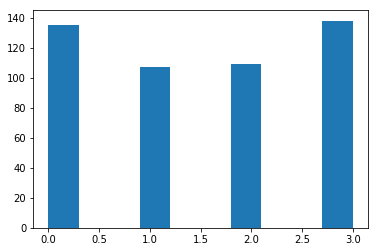

In [12]:
plt.hist(labels)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.33, random_state=42)

# SVM

In [17]:
model_SVM = svm.SVC(kernel='linear', C=0.1)
model_SVM.fit(X_train, y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
pred_train_SVM = model_SVM.predict(X_train)
pred_test_SVM = model_SVM.predict(X_test)

In [26]:
print('Train accuracy: {}'.format(accuracy_score(y_train,pred_train_SVM)))
print('Test accuracy: {}'.format(accuracy_score(y_test,pred_test_SVM)))

Train accuracy: 1.0
Test accuracy: 0.8950617283950617


In [269]:
print(confusion_matrix(y_test,pred_test_SVM))

[[42  3  2  1]
 [ 2 30  2  0]
 [ 1  0 30  2]
 [ 3  1  0 43]]


# Random Forest

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.33, random_state=43)

In [28]:
model_RF = RandomForestClassifier(max_depth=3, random_state=0)
model_RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [29]:
pred_train_RF = model_RF.predict(X_train)
pred_test_RF = model_RF.predict(X_test)

In [30]:
print('Train accuracy: {}'.format(accuracy_score(y_train,pred_train_RF)))
print('Test accuracy: {}'.format(accuracy_score(y_test,pred_test_RF)))

Train accuracy: 0.8746177370030581
Test accuracy: 0.7962962962962963


In [31]:
print(confusion_matrix(y_test,pred_test_RF))

[[28  3  0 12]
 [ 4 28  2  0]
 [ 0  5 30  1]
 [ 4  0  2 43]]


# Linear Discriminant

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.33, random_state=44)

In [36]:
model_LD = LinearDiscriminantAnalysis()
model_LD.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [37]:
pred_train_LD = model_LD.predict(X_train)
pred_test_LD = model_LD.predict(X_test)

In [38]:
print('Train accuracy: {}'.format(accuracy_score(y_train,pred_train_LD)))
print('Test accuracy: {}'.format(accuracy_score(y_test,pred_test_LD)))

Train accuracy: 1.0
Test accuracy: 0.3271604938271605


In [39]:
print(confusion_matrix(y_test,pred_test_LD))

[[ 5 12 12 12]
 [ 6 13  9 13]
 [ 6  5 13 11]
 [ 4  8 11 22]]


# Quadratic Discriminant

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.33, random_state=45)

In [283]:
model_QD = QuadraticDiscriminantAnalysis()

In [43]:
model_QD = QuadraticDiscriminantAnalysis()
model_QD.fit(X_train, y_train)

/Users/mariavarga/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

In [44]:
pred_train_QD = model_QD.predict(X_train)
pred_test_QD = model_QD.predict(X_test)

In [45]:
print('Train accuracy: {}'.format(accuracy_score(y_train,pred_train_QD)))
print('Test accuracy: {}'.format(accuracy_score(y_test,pred_test_QD)))

Train accuracy: 1.0
Test accuracy: 0.32098765432098764


In [46]:
print(confusion_matrix(y_test,pred_test_QD))

[[14 14 12  2]
 [ 8  9 13 10]
 [ 6  9 14  6]
 [ 6 11 13 15]]


# Ensemble

## bagging 

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.33, random_state=46)

In [49]:
eclf1 = VotingClassifier(estimators=[('SVM', model_SVM), ('RF', model_RF), ('LD', model_LD), ('QD', model_QD)], voting='hard')

In [50]:
eclf1.fit(X_train,y_train)

/Users/mariavarga/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


VotingClassifier(estimators=[('SVM', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)), ('RF', RandomForestClassifier(bootstrap=True, clas...rs=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [51]:
pred_train = eclf1.predict(X_train)
pred_test = eclf1.predict(X_test)

In [52]:
print('Train accuracy: {}'.format(accuracy_score(y_train,pred_train)))
print('Test accuracy: {}'.format(accuracy_score(y_test,pred_test)))

Train accuracy: 1.0
Test accuracy: 0.7839506172839507


In [53]:
print(confusion_matrix(y_test,pred_test))

[[37  0  1  4]
 [12 25  2  2]
 [ 1  0 34  1]
 [ 8  1  3 31]]


# Stacking

In [54]:
def apply_model(model,X):
    
    X_model = model.predict(X)
    
    return X_model

In [55]:
X_SVM = apply_model(model_SVM,X)
X_RF = apply_model(model_RF,X)
X_LD = apply_model(model_LD,X)
X_QD = apply_model(model_QD,X)

In [56]:
X_ens = np.transpose(np.vstack((X_SVM,X_RF,X_LD,X_QD)))
#X_ens = pd.DataFrame({"X_SVM":X_SVM,"X_RF":X_RF,"X_LD":X_LD,"X_QD":X_QD})

In [58]:
X_ens_train, X_ens_test, y_train, y_test = train_test_split(X_ens, labels, test_size=0.33, random_state=42)

In [59]:
from sklearn.linear_model import LogisticRegression

In [61]:
stk = LogisticRegression()

In [62]:
stk.fit(X_ens_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [63]:
pred_train_stk = stk.predict(X_ens_train)
pred_test_stk = stk.predict(X_ens_test)

In [64]:
print('Train accuracy: {}'.format(accuracy_score(y_train,pred_train_stk)))
print('Test accuracy: {}'.format(accuracy_score(y_test,pred_test_stk)))

Train accuracy: 0.944954128440367
Test accuracy: 0.8518518518518519


In [65]:
print(confusion_matrix(y_test,pred_test))

[[16  9 13 10]
 [13  5 13  3]
 [14  3  7  9]
 [15  9  7 16]]


# Stacking NN (because why not?)

In [183]:
from keras.models import Model
from keras.layers.core import Activation,Dropout,Dense, Dropout
from keras.layers import Input
from keras.optimizers import Adam
from keras.initializers import glorot_uniform
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.regularizers import l1,l2

In [71]:
 from sklearn.preprocessing import LabelEncoder

In [72]:
# to one hot encoding
dummy_y = np_utils.to_categorical(labels)

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X_ens, dummy_y, test_size=0.33, random_state=4)

In [120]:
X_train.shape

(327, 4)

In [121]:
def get_model(input_shape=4):
    
    inputs = Input(shape=(input_shape,))
    X = BatchNormalization()(inputs)
    X = Dense(4,activation='softmax')(inputs)
    
    model = Model(inputs=inputs, outputs=X)
    
    return model

In [122]:
NN = get_model(input_shape=4)

In [123]:
opt = Adam(lr=0.01)
NN.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [127]:
NN.fit(X_train, y_train, epochs=10, validation_data = (X_test, y_test),shuffle = True) 

Train on 327 samples, validate on 162 samples
Epoch 1/10
327/327 [==============================] - 0s - loss: 0.3891 - acc: 0.9419 - val_loss: 0.5670 - val_acc: 0.8951
Epoch 2/10
327/327 [==============================] - 0s - loss: 0.3908 - acc: 0.9450 - val_loss: 0.5669 - val_acc: 0.8951
Epoch 3/10
327/327 [==============================] - 0s - loss: 0.3874 - acc: 0.9480 - val_loss: 0.5643 - val_acc: 0.8827
Epoch 4/10
327/327 [==============================] - 0s - loss: 0.3850 - acc: 0.9419 - val_loss: 0.5641 - val_acc: 0.8951
Epoch 5/10
327/327 [==============================] - 0s - loss: 0.3835 - acc: 0.9450 - val_loss: 0.5643 - val_acc: 0.8889
Epoch 6/10
327/327 [==============================] - 0s - loss: 0.3849 - acc: 0.9450 - val_loss: 0.5619 - val_acc: 0.9012
Epoch 7/10
327/327 [==============================] - 0s - loss: 0.3802 - acc: 0.9511 - val_loss: 0.5612 - val_acc: 0.9012
Epoch 8/10
327/327 [==============================] - 0s - loss: 0.3800 - acc: 0.9480 - val_l

# Only NN

In [80]:
from sklearn.preprocessing import normalize

In [128]:
X_np = normalize(X)

In [237]:
X_train, X_test, y_train, y_test = train_test_split(X_np, dummy_y, test_size=0.33, random_state=42)

In [174]:
X_train.shape

(327, 321)

In [236]:
def get_model(input_shape=321):
    
    inputs = Input(shape=(input_shape,))
    #X = BatchNormalization()(inputs)
    X = Dropout(0.7)(inputs)
    X = Dense(60,activation='relu')(X)
    #X = Dense(60,activation='relu',activity_regularizer=l1(0.01))(X)
    #X = Dropout(0.3)(X)
    #X = BatchNormalization()(X)
    #X = Dense(20,activation='relu')(X)
    X = Dropout(0.5)(X)
    X = BatchNormalization()(X)
    X = Dense(4,activation='softmax')(X)
    model = Model(inputs=inputs, outputs=X)
    
    return model

In [226]:
NN = get_model()

In [227]:
NN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 321)               0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 321)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 60)                19320     
_________________________________________________________________
dropout_14 (Dropout)         (None, 60)                0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 60)                240       
_________________________________________________________________
dense_16 (Dense)             (None, 4)                 244       
Total params: 19,804
Trainable params: 19,684
Non-trainable params: 120
_________________________________________________________________


In [228]:
opt = Adam(lr=0.01)
NN.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [231]:
NN.fit(X_train, y_train, epochs=10, validation_data = (X_test, y_test),shuffle = True) 

Train on 327 samples, validate on 162 samples
Epoch 1/10
327/327 [==============================] - 0s - loss: 0.3764 - acc: 0.8349 - val_loss: 0.3484 - val_acc: 0.8951
Epoch 2/10
327/327 [==============================] - 0s - loss: 0.3216 - acc: 0.8899 - val_loss: 0.3314 - val_acc: 0.9012
Epoch 3/10
327/327 [==============================] - 0s - loss: 0.4025 - acc: 0.8440 - val_loss: 0.3153 - val_acc: 0.9012
Epoch 4/10
327/327 [==============================] - 0s - loss: 0.3595 - acc: 0.8502 - val_loss: 0.3165 - val_acc: 0.9136
Epoch 5/10
327/327 [==============================] - 0s - loss: 0.3729 - acc: 0.8593 - val_loss: 0.3008 - val_acc: 0.9012
Epoch 6/10
327/327 [==============================] - 0s - loss: 0.3775 - acc: 0.8624 - val_loss: 0.2876 - val_acc: 0.9136
Epoch 7/10
327/327 [==============================] - 0s - loss: 0.3176 - acc: 0.8777 - val_loss: 0.2781 - val_acc: 0.9136
Epoch 8/10
327/327 [==============================] - 0s - loss: 0.3315 - acc: 0.8746 - val_l

In [232]:
pred_train_NN = NN.predict(X_train)
pred_test_NN = NN.predict(X_test)

In [233]:
print('Train accuracy: {}'.format(accuracy_score(np.argmax(y_train,axis=1),np.argmax(pred_train_NN,axis=1))))
print('Test accuracy: {}'.format(accuracy_score(np.argmax(y_test,axis=1),np.argmax(pred_test_NN,axis=1))))

Train accuracy: 0.9908256880733946
Test accuracy: 0.9197530864197531


In [234]:
print(confusion_matrix(np.argmax(y_test,axis=1),np.argmax(pred_test_NN,axis=1)))

[[42  0  3  3]
 [ 1 32  1  0]
 [ 1  0 32  0]
 [ 2  0  2 43]]


In [247]:
def get_model2(input_shape=321):
    
    inputs = Input(shape=(input_shape,))
    #X = BatchNormalization()(inputs)
    X = Dropout(0.7)(inputs)
    X = Dense(10,activation='relu')(X)
    X = Dropout(0.7)(inputs)
    X = BatchNormalization()(X)
    X = Dense(30,activation='relu')(X)
    X = Dropout(0.7)(X)
    X = BatchNormalization()(X)
    X = Dense(10,activation='relu')(X)
    X = Dropout(0.7)(X)
    X = BatchNormalization()(X)
    X = Dense(4,activation='softmax')(X)
    model = Model(inputs=inputs, outputs=X)
    
    return model

In [248]:
NN2 = get_model()

In [249]:
opt = Adam(lr=0.01)
NN2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [251]:
NN2.fit(X_train, y_train, epochs=5, validation_data = (X_test, y_test),shuffle = True) 

Train on 327 samples, validate on 162 samples
Epoch 1/5
327/327 [==============================] - 0s - loss: 0.4267 - acc: 0.8471 - val_loss: 0.5391 - val_acc: 0.8704
Epoch 2/5
327/327 [==============================] - 0s - loss: 0.4483 - acc: 0.7982 - val_loss: 0.5042 - val_acc: 0.8889
Epoch 3/5
327/327 [==============================] - 0s - loss: 0.3592 - acc: 0.8654 - val_loss: 0.4562 - val_acc: 0.9136
Epoch 4/5
327/327 [==============================] - 0s - loss: 0.3866 - acc: 0.8349 - val_loss: 0.4152 - val_acc: 0.9136
Epoch 5/5
327/327 [==============================] - 0s - loss: 0.4291 - acc: 0.8440 - val_loss: 0.3928 - val_acc: 0.9136


In [252]:
pred_train_NN2 = NN2.predict(X_train)
pred_test_NN2 = NN2.predict(X_test)

In [253]:
print('Train accuracy: {}'.format(accuracy_score(np.argmax(y_train,axis=1),np.argmax(pred_train_NN2,axis=1))))
print('Test accuracy: {}'.format(accuracy_score(np.argmax(y_test,axis=1),np.argmax(pred_test_NN2,axis=1))))

Train accuracy: 0.9877675840978594
Test accuracy: 0.9135802469135802
